# Hotel Reservations
Para este proyecto se utilizara el siguiente dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset, el cual contiene datos sobre los distintos tipos de reservas de un hotel y si sus huéspedes asistieron a la misma o la cancelaron.


### Objetivos:
- Analizar cada variable de manera individual para **describir y visualizar** las frecuencias de las mismas.
- Hacer un análisis **explorando** la relación entre la variable 'bookig_status' (el estado de la reserva) y el resto de variables.
- **Normalizar datos** y hacer un **balanceo de clases** para equilibrar los valores de algunas variables.
- Intentar **predecir** si futuros clientes cancelaran o no su reserva a partir de un modelo de Machine Learning.

<br>

**Variables del dataset:**

1. "Booking_ID": unique identifier of each booking <br>
2. "no_of_adults": Number of adults <br>
3. "no_of_children": Number of Children <br>
4. "no_of_weekend_nights": Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel <br>
5. "no_of_week_nights": Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel <br>
6. "type_of_meal_plan": Type of meal plan booked by the customer <br>
7. "required_car_parking_space": Does the customer require a car parking space? (0 - No, 1- Yes) <br>
8. "room_type_reserved": Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. <br>
9. "lead_time": Number of days between the date of booking and the arrival date <br>
10. "arrival_year": Year of arrival date <br>
11. "arrival_month": Month of arrival date
12. "arrival_date": Date of the month <br>
13. "market_segment_type": Market segment designation. <br>
14. "repeated_guest": Is the customer a repeated guest? (0 - No, 1- Yes) <br>
15. "no_of_previous_cancellations": Number of previous bookings that were canceled by the customer prior to the current booking <br>
16. "no_of_previous_bookings_not_canceled": Number of previous bookings not canceled by the customer prior to the current booking <br>
17. "avg_price_per_room": Average price per day of the reservation; prices of the rooms are dynamic. (in euros) <br>
18. "no_of_special_requests": Total number of special requests made by the customer (e.g. high floor, view from the room, etc) <br>
19. "booking_status": Flag indicating if the booking was canceled or not. <br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hotel-reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploración del dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
duplicados = data.duplicated()
print(data[duplicados])

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Análisis individual de variables 
- ### **Se visualizan las frecuencias absolutas y relativas de las variables del dataset**

 ## **Variables categóricas:**

In [32]:
col_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for i in col_cat:
    print('FRECUENCIA ABSOLUTA', '\n',
          'Variable: ',[i],'\n',
        'Cantidad: ', '\n',
        data[i].value_counts(),'\n',
         '---------------------------------------')

FRECUENCIA ABSOLUTA 
 Variable:  ['type_of_meal_plan'] 
 Cantidad:  
 Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['room_type_reserved'] 
 Cantidad:  
 Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['market_segment_type'] 
 Cantidad:  
 Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['booking_status'] 
 Cantidad:  
 Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64 
 ---------------------------------------


In [31]:
for i in col_cat:
    print('FRECUENCIA RELATIVA', '\n',
        'Variable: ', [i],'\n',
        'Porcentaje: ', '\n',
        data[i].value_counts()/data[i].value_counts().sum()*100 ,'\n',
         '---------------------------------------')

FRECUENCIA RELATIVA 
 Variable:  ['type_of_meal_plan'] 
 Porcentaje:  
 Meal Plan 1     76.733287
Not Selected    14.141971
Meal Plan 2      9.110958
Meal Plan 3      0.013784
Name: type_of_meal_plan, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['room_type_reserved'] 
 Porcentaje:  
 Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: room_type_reserved, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['market_segment_type'] 
 Porcentaje:  
 Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: market_segment_type, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['booking_status'] 
 Porcentaje:  
 Not_Canceled    67.236389
Canceled        32.7636

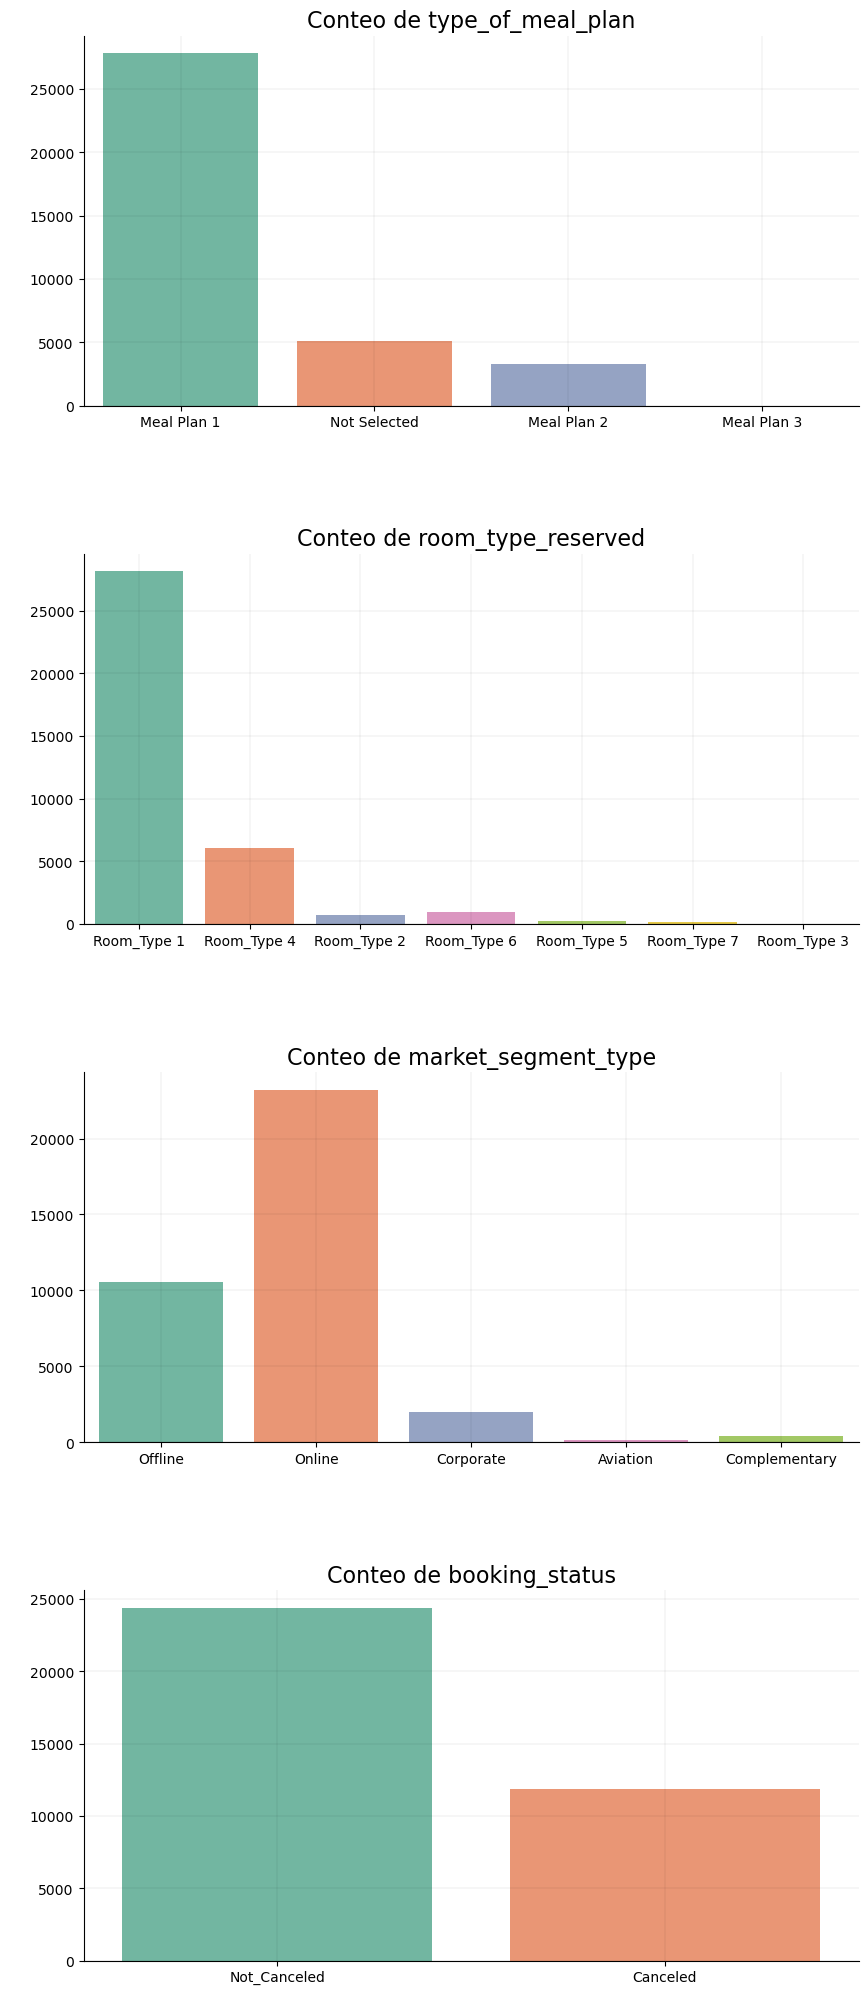

In [45]:
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,25))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i], palette = 'Set2')
  ax[i].set_title('Conteo de ' + col, fontdict={'size':16})
  ax[i].set(xlabel=' ', ylabel=' ')
  ax[i].grid(color='black', linewidth=0.05)
  sns.despine()

plt.show()

## Observaciones:
- El tipo de comida mas solicitada fue la tipo 1 con 27.835 pedidos (76,73%). <br>Hubo 5.130 huéspedes que no solicitaron plan de comidas (14%). 
- El tipo de habitación mas solicitado fue la número 1 con 28.130 pedidos (77%)
- El tipo de segmento de mercado que hizo las reservas fueron en su mayoría Online con  23.214 reservas (63%)
- Hay 24.390 reservas que no fueron canceladas (67,23%) y casi la mitad, 11.885 reservas que si fueron canceladas(32,76%)

In [33]:
col_cat_2 = ['repeated_guest','required_car_parking_space']

for i in col_cat_2:
    print('FRECUENCIA ABSOLUTA', '\n',
        'Variable: ',[i],'\n',
        'Cantidad: ', '\n',
        data[i].value_counts(),'\n',
         '---------------------------------------')

FRECUENCIA ABSOLUTA 
 Variable:  ['repeated_guest'] 
 Cantidad:  
 0    35345
1      930
Name: repeated_guest, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['required_car_parking_space'] 
 Cantidad:  
 0    35151
1     1124
Name: required_car_parking_space, dtype: int64 
 ---------------------------------------


In [30]:
for i in col_cat_2:
    print('FRECUENCIA RELATIVA', '\n',
        'Variable: ',[i],'\n',
        'Porcentaje: ', '\n',
        data[i].value_counts()/data[i].value_counts().sum()*100 ,'\n',
         '---------------------------------------')

FRECUENCIA RELATIVA 
 Variable:  ['repeated_guest'] 
 Porcentaje:  
 0    97.436251
1     2.563749
Name: repeated_guest, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['required_car_parking_space'] 
 Porcentaje:  
 0    96.901447
1     3.098553
Name: required_car_parking_space, dtype: float64 
 ---------------------------------------


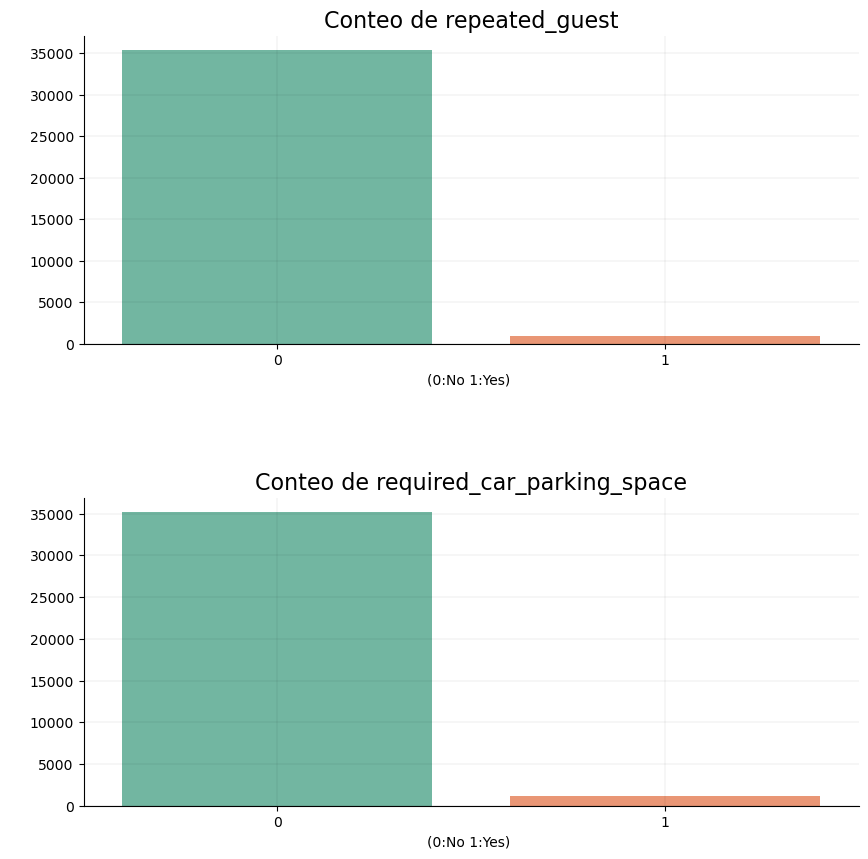

In [44]:
fig, ax = plt.subplots(nrows = len(col_cat_2), ncols=1,  figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat_2):
    sns.countplot(x=col, data=data, ax=ax[i], palette = 'Set2')
    ax[i].set_title('Conteo de ' + col, fontdict={'size':16})
    ax[i].set(xlabel='(0:No 1:Yes) ', ylabel=' ')
    ax[i].grid(color='black', linewidth=0.05)
    sns.despine()

## Observaciones:
- Hay 35.345 huéspedes que son nuevos (97,43%) y 930 que son huéspedes repetidos (2,56%). 
- Hay 35.151 huéspedes que no solicitaron espacio para estacionar (96,90%) y 1.124 que si (3%)

In [34]:
col_cat_3 = ['arrival_year','arrival_month', 'arrival_date']

for i in col_cat_3:
     print('FRECUENCIA ABSOLUTA', '\n',
        'Variable: ',[i],'\n',
        'Cantidad: ', '\n',
        data[i].value_counts(),'\n',
         '---------------------------------------') 

FRECUENCIA ABSOLUTA 
 Variable:  ['arrival_year'] 
 Cantidad:  
 2018    29761
2017     6514
Name: arrival_year, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['arrival_month'] 
 Cantidad:  
 10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64 
 ---------------------------------------
FRECUENCIA ABSOLUTA 
 Variable:  ['arrival_date'] 
 Cantidad:  
 13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64 
 ---------------------------------------


In [35]:
for i in col_cat_3:
    print('FRECUENCIA RELATIVA', '\n',
        'Variable: ',[i],'\n',
        'Porcentaje: ', '\n',
        data[i].value_counts()/data[i].value_counts().sum()*100 ,'\n',
         '---------------------------------------')

FRECUENCIA RELATIVA 
 Variable:  ['arrival_year'] 
 Porcentaje:  
 2018    82.042729
2017    17.957271
Name: arrival_year, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['arrival_month'] 
 Porcentaje:  
 10    14.657478
9     12.711234
8     10.511371
6      8.829773
12     8.328050
11     8.215024
7      8.049621
4      7.542385
5      7.161957
3      6.500345
2      4.697450
1      2.795314
Name: arrival_month, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['arrival_date'] 
 Porcentaje:  
 13    3.743625
17    3.707788
2     3.669194
4     3.658167
19    3.658167
16    3.600276
20    3.531358
15    3.509304
6     3.509304
18    3.473467
14    3.423846
30    3.352171
12    3.319090
8     3.302550
29    3.280496
21    3.192281
5     3.181254
26    3.159201
25    3.159201
1     3.123363
9     3.115093
28    3.112336
7     3.059959
24    3.040662
11    3.026878
3     3.026878
10    3.002068
27    2.91

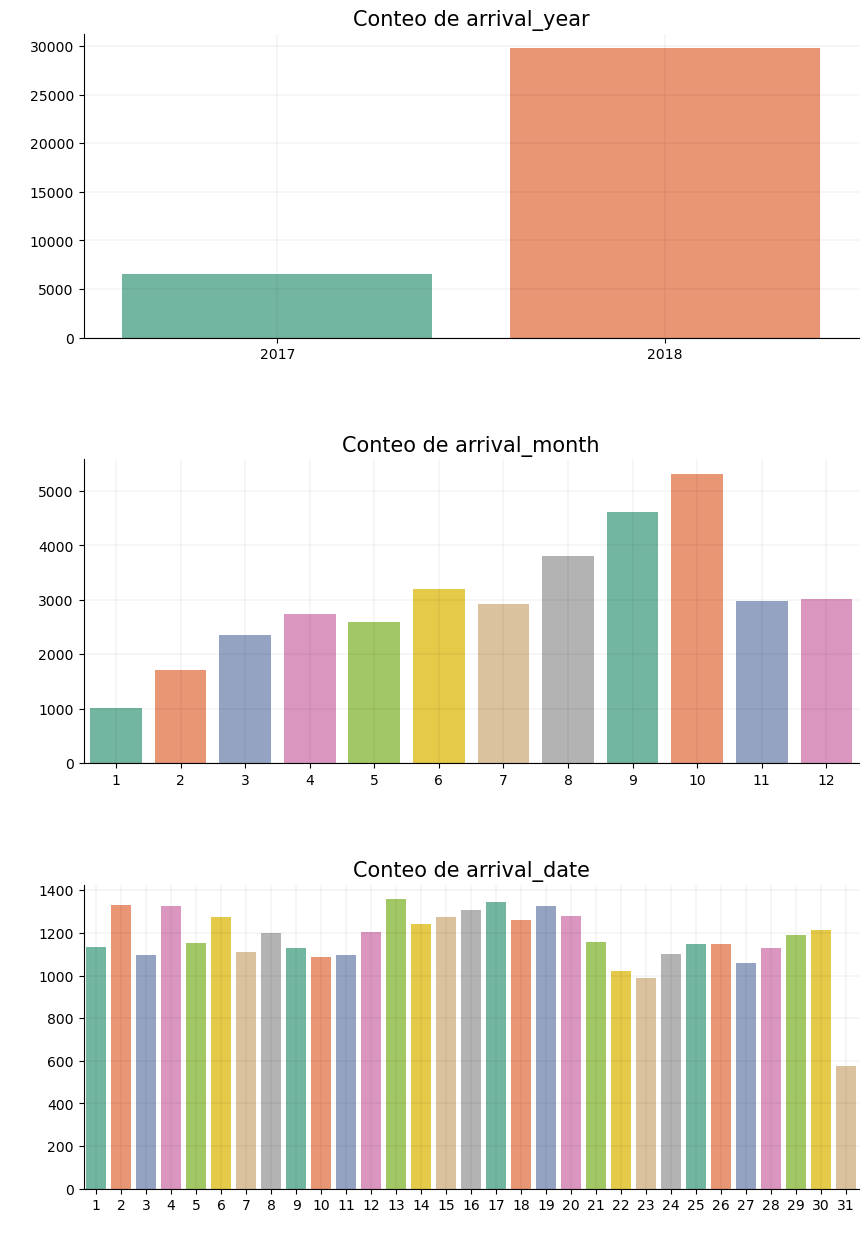

In [43]:
fig, ax = plt.subplots(nrows = len(col_cat_3), ncols=1,  figsize=(10,15))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(col_cat_3):
    sns.countplot(x=col, data=data, ax=ax[i], palette = 'Set2')
    ax[i].set_title('Conteo de ' + col, fontdict={'size':15})
    ax[i].set(xlabel=' ', ylabel=' ')
    ax[i].grid(color='black', linewidth=0.05)
    sns.despine()

## Observaciones:
- Hay 29.761 huéspedes que llegaron en el 2018 (82%) y 6.514 que llegaron en el 2017 (17%)
- El mes con mas llegadas de huéspedes es el 10 - Octubre (14%), seguido por el 9 - Septiembre (12%). El mes con menos arrivos de huéspedes es el 1 - Enero (2,79%)
- Los días de llegada de huéspedes se distribuyen de forma bastante pareja. Los días con menos arrivos son los días 23 y 31

# Variables numéricas:

In [36]:
col_num_1 = ['no_of_adults','no_of_children',
             'no_of_weekend_nights','no_of_week_nights', 
             'no_of_special_requests','no_of_previous_cancellations',
             'no_of_previous_bookings_not_canceled']

for i in col_num_1:
    print('Variable: ', [i],'\n',
          'Cantidad: ', '\n',
        data[i].value_counts(),'\n',
         '---------------------------------------')

Variable:  ['no_of_adults'] 
 Cantidad:  
 2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64 
 ---------------------------------------
Variable:  ['no_of_children'] 
 Cantidad:  
 0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64 
 ---------------------------------------
Variable:  ['no_of_weekend_nights'] 
 Cantidad:  
 0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64 
 ---------------------------------------
Variable:  ['no_of_week_nights'] 
 Cantidad:  
 2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64 
 ---------------------------------------
Variable:  ['no_of_special_requests'] 
 Cantidad:  
 0    19777
1  

In [37]:
for i in col_num_1:
    print('FRECUENCIA RELATIVA', '\n',
        'Variable: ',[i],'\n',
        'Porcentaje: ', '\n',
        data[i].value_counts()/data[i].value_counts().sum()*100 ,'\n',
         '---------------------------------------')

FRECUENCIA RELATIVA 
 Variable:  ['no_of_adults'] 
 Porcentaje:  
 2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: no_of_adults, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['no_of_children'] 
 Porcentaje:  
 0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['no_of_weekend_nights'] 
 Porcentaje:  
 0    46.511371
1    27.553411
2    25.006203
3     0.421778
4     0.355617
5     0.093728
6     0.055134
7     0.002757
Name: no_of_weekend_nights, dtype: float64 
 ---------------------------------------
FRECUENCIA RELATIVA 
 Variable:  ['no_of_week_nights'] 
 Porcentaje:  
 2     31.547898
1     26.155755
3     21.609924
4      8.242591
0      6.580289
5      4.449345
6      0.521020
7      0.311509
10     0.170917
8      0.170917
9      0.093728
11     0.

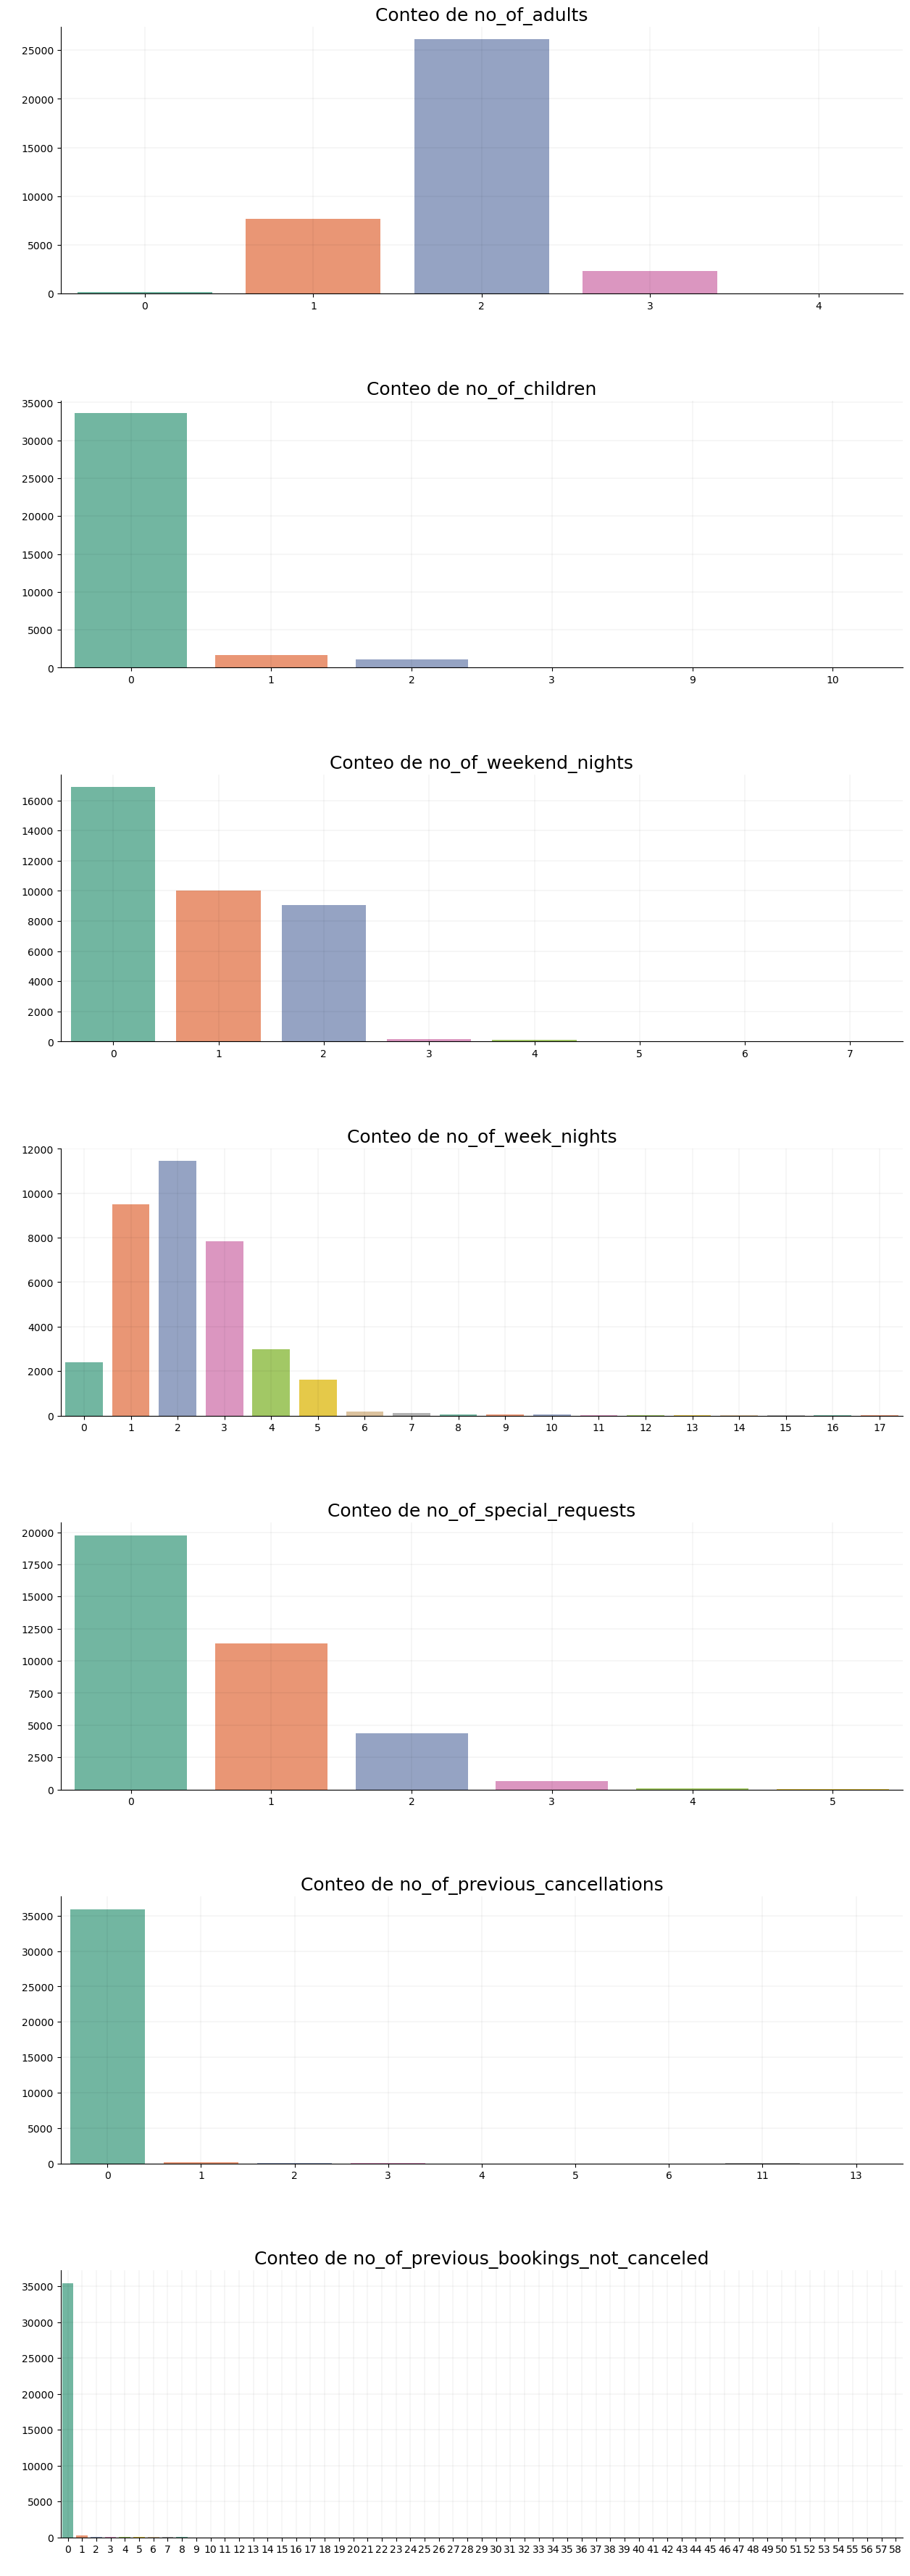

In [50]:
fig, ax = plt.subplots(nrows = len(col_num_1), ncols=1,  figsize=(15,45))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(col_num_1):
        sns.countplot(x=col, data=data, ax=ax[i], palette = 'Set2')
        #sns.histplot(x=col, data=data, ax=ax[i], bins=4, kde = True)
        ax[i].set_title('Conteo de ' + col, fontdict={'size':18})
        ax[i].set(xlabel=' ', ylabel=' ')
        ax[i].grid(color='black', linewidth=0.05)
        sns.despine()

## Observaciones:
- Hay 26.108 reservas con 2 adultos (71%) y hay solo 16 reservas con 4 adultos (0.04%)
- La mayoría de las reservas, 33.577, son sin niños (92%)
- Las reservas en su mayoría NO incluyen noches del fin de semana (16.872 reservas, 46%).<br> Le siguen entre 9000 y 9900 reservas que incluyen 2 o 1 noche del fin de semana (27 - 25%). 
- La mayor parte de las reservas incluyen 2 noches de días de semana, 11.444 reservas (31%).<br> Hay solo 2 reservas con 16 noches de dias de semana.
- Hay 19.777 reservas que no incluyen ningun pedido especial (54%)
- Casi el total de los clientes hicieron 0 cancelaciones previas a la reserva actual (99,06%)
- Hay 35.463 reservas que no fueron canceladas por los clientes previas a la reserva actual (97%)

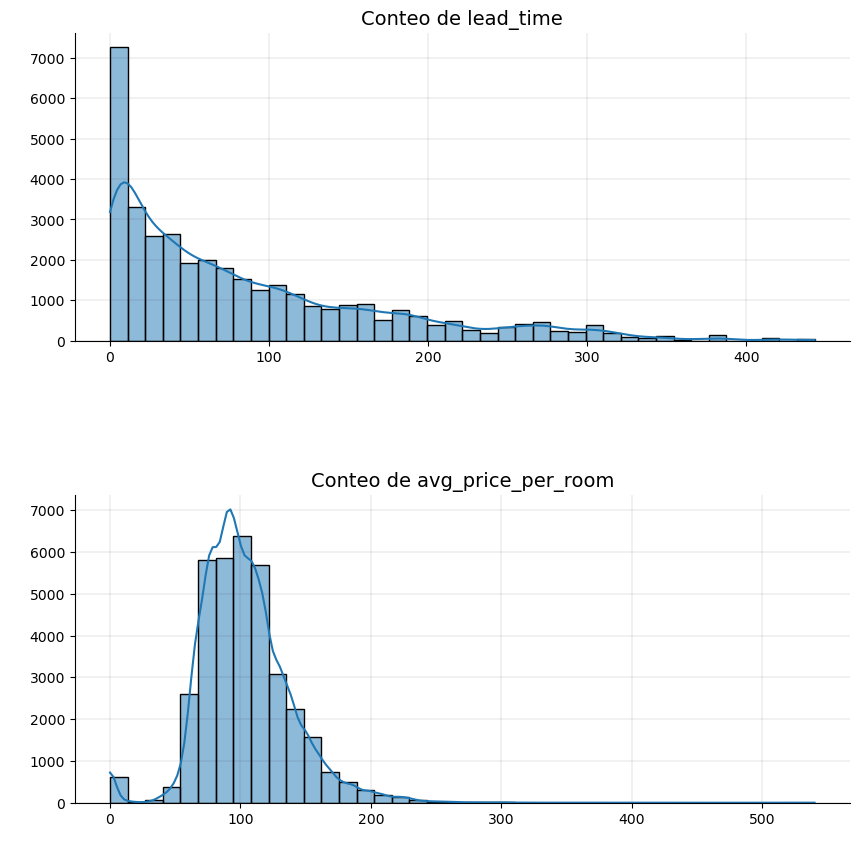

In [47]:
col_num_2 = ['lead_time', 'avg_price_per_room']

fig, ax = plt.subplots(nrows = len(col_num_2), ncols=1,  figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num_2):
    sns.histplot(x=col, data=data, ax=ax[i], bins=40, kde = True)
    ax[i].set_title('Conteo de ' + col, fontdict={'size':14})
    ax[i].set(xlabel=' ', ylabel=' ')
    ax[i].grid(color='black', linewidth=0.08)
    sns.despine()

## Observaciones:
- La cantidad de días entre la reserva y el día de llegada oscila entre los 0 y 440 días aprox, con un promedio de 85 días.
- La mayor concentración de precios de las habitaciones es entre los 70 y 120 euros. Con un promedio de 103 euros la habitación